In [1]:
import cv2
from recognizer import RecognizerController
from model import EuclideanClassifier, LogisticClassifier,\
    LinearClassifier, RandomForestClassifier, NeuralNetworkClassifier
import os
import pandas as pd
import numpy as np
import random
import json
from sklearn.metrics import confusion_matrix, roc_auc_score
import itertools
import matplotlib.pyplot as plt

#### Due to the false key point detection on static image of mediapipe, the classification accuracy is lower than expected

## Load Test Data
Data are extracted features from images in senz3d dataset. Mediapipe is used to extract keypoints and my encoder convert keypoints to the desired features.

In [2]:
data_dir = 'keypoint_data'
gesture_list = os.listdir(data_dir)
gesture_list = [g for g in gesture_list if '.json' in g]
gesture_list

['G2.json',
 'G3.json',
 'G4.json',
 'G8.json',
 'G9.json',
 'G5.json',
 'G6.json',
 'G7.json',
 'G10.json',
 'G11.json',
 'G1.json']

In [3]:
labels = [g.split('.')[0] for g in gesture_list]
labels

['G2', 'G3', 'G4', 'G8', 'G9', 'G5', 'G6', 'G7', 'G10', 'G11', 'G1']

In [4]:
label_map = {
    'G1': 0,
    'G2': 2,
    'G3': 3,
    'G4': 4,
    'G5': 5,
    'G6': 6,
    'G7': 7,
    'G8': 8,
    'G9': 9,
    'G10': 10,
    'G11': 11,
    'undefined': 12
}

cm_classes = labels.copy()
cm_classes.append('other')

def convert_label(pred):
    return label_map[pred]

In [5]:
gesture_dict = {}
for gesture, label in zip(gesture_list, labels):
    ges_path = os.path.join(data_dir, gesture)
    with open(ges_path, 'r') as f:
        data = json.load(f)
    gesture_dict[label] = np.array(data)


In [6]:
# feed 3 frames per prediction
def get_predictions(clf):
    y_pred = []
    y_true = []
    for gesture in gesture_dict:
        data = gesture_dict[gesture]
        for feature in data:
            pred = clf.predict(feature)
            y_pred.append(pred)
            y_true.append(gesture)
#     count = 0
#     for i, row in main_df.iterrows():
#         clf.reset_hand()
#         img = cv2.imread(row['path'])
#         if random.random() < 0.5:
#             img = cv2.flip(img, 1)
#         frames = []
#         my_df = main_df[main_df['label'] == row['label']].sample(n=2)
#         for _, r in my_df.iterrows():
#             img = cv2.imread(r['path'])
#             frames.append(img)
#         frames.append(org_img)
#         y_true.append(row['label'])
#         pred = 'undefined'
#         for img in frames:
#             pred = clf.get_prediction(img)
#         pred = clf.get_prediction(img)
#         y_pred.append(pred)
    return y_true, y_pred

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


## Linear Regression

In [8]:
linear_clf = LinearClassifier('gestures_encode_name')

Found 11 in gestures_encode_name.
Gestures are loaded successfully.


In [9]:
y_true, y_pred = get_predictions(linear_clf)

In [10]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)

Confusion matrix, without normalization
[[96  0  0  0  0  2  0  0  0  1  0  5]
 [ 4 82  2  0  1  2  2  0  0  1  1  4]
 [ 0  1 68  1  2  6  2  2  0  0  3  3]
 [ 0  1  0 63  5  3  1  1  3  0  0  2]
 [ 3  0  0  2 79  1  0  0  1  0  0  4]
 [ 1  0  0  0  0 88  0  0  0  0  0  3]
 [ 0  3  4  1  0  2 56  0 13  0  0  3]
 [ 1  0  9  1  0  6  0 65  1  2  3  2]
 [ 0  4  1 11  7  3  4  0 64  0  1  7]
 [ 3  0  0  0  1  6  0  0  1 69  2  8]
 [ 7  0  0  0  0  6  0  0  0  2 75  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]]


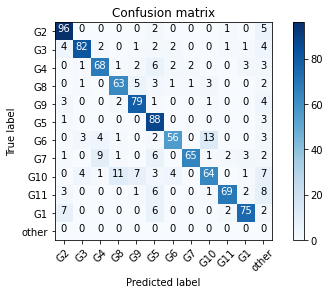

In [11]:
plot_confusion_matrix(cm=cm, classes=cm_classes)

## Logistic Regression

In [25]:
logistic_clf = LogisticClassifier('gestures_encode_name')

Found 11 in gestures_encode_name.
Gestures are loaded successfully.


In [26]:
y_true, y_pred = get_predictions(logistic_clf)

Confusion matrix, without normalization
[[57  0  0  0  0 40  0  0  0  1  0  6]
 [ 3 68  0  0  0  2  0  0  0  0  0 26]
 [ 0  0 45  0  0  4  2 18  1  0  0 18]
 [ 0  0  0 59  5  0  0  0  2  0  0 13]
 [ 0  0  0  1 75  2  0  0  1  0  0 11]
 [ 1  0  0  0  0 89  0  0  0  0  0  2]
 [ 0  3  0  1  0  2 51  1  2  0  0 22]
 [ 0  0  3  0  0  2  0 61  1  0  0 23]
 [ 1  3  0  1  1  0  0  5 60  0  0 31]
 [ 2  0  0  0  0 53  0  0  0 22  2 11]
 [ 2  0  0  0  0 10  0  0  0  0 75  5]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]]


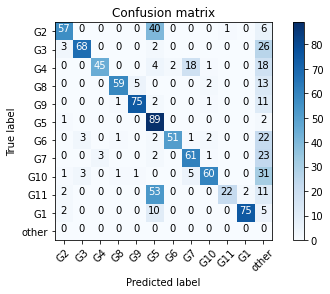

In [27]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
plot_confusion_matrix(cm=cm, classes=cm_classes)

## Random Forest

In [28]:
rf_clf = RandomForestClassifier('gestures_encode_name')

Found 11 in gestures_encode_name.
Gestures are loaded successfully.


In [29]:
y_true, y_pred = get_predictions(rf_clf)

Confusion matrix, without normalization
[[67  0  0  4  0 31  0  0  0  1  1]
 [ 3 66  5  8  1  5  4  5  1  0  1]
 [ 0  1 36  4  0  5  3 36  2  0  1]
 [ 0  0  0 64 11  1  1  0  2  0  0]
 [ 2  0  0  7 75  5  0  0  1  0  0]
 [ 1  0  0  1  0 90  0  0  0  0  0]
 [ 0  4  1 11  3  2 55  1  5  0  0]
 [ 0  0  5  9  0  6  0 67  3  0  0]
 [ 1  1  0 17  5  3  4  3 67  0  1]
 [ 2  0  0  2  1 52  0  1  0 31  1]
 [ 2  0  0  2  0 12  0  0  0  2 74]]


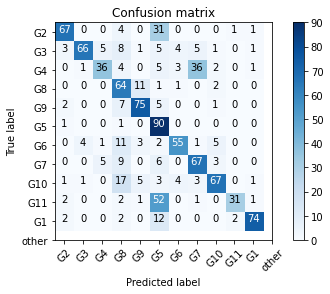

In [30]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
plot_confusion_matrix(cm=cm, classes=cm_classes)

## Euclidean Classifier

In [12]:
euclid_clf = EuclideanClassifier('gestures_encode_name')

Found 11 in gestures_encode_name.
Gestures are loaded successfully.


In [13]:
y_true, y_pred = get_predictions(euclid_clf)

Confusion matrix, without normalization
[[100   0   0   0   0   1   0   0   0   2   0   1]
 [  6  69   4   0   2   2   2   1   5   1   1   6]
 [  0   0  72   0   0   6   1   3   2   0   1   3]
 [  0   0   0  61   9   2   1   1   3   0   0   2]
 [  4   0   0   6  74   1   0   0   1   0   0   4]
 [  1   0   0   0   0  91   0   0   0   0   0   0]
 [  0   3   0   2   1   2  48   1  16   0   0   9]
 [  0   0  13   0   0   7   0  63   1   2   1   3]
 [  1   4   1   6   1   6   2   2  71   0   1   7]
 [  6   0   0   0   0  11   0   0   0  70   2   1]
 [  8   0   0   0   0   3   0   0   0   3  77   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0]]


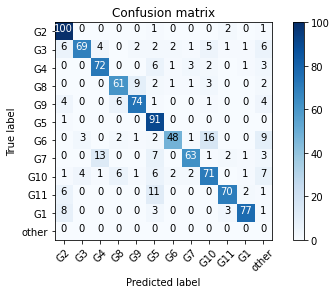

In [14]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
plot_confusion_matrix(cm=cm, classes=cm_classes)